<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/Hurst_Exponent_to_analyse_the_Stock_and_Crypto_market_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Hurst Exponent
The Hurst exponent or also denoted by the letter ‘H’ is a measure of long-term memory of a time series where we measure the amount by which a given time series deviates from a random walk. The scalar value shows the relative tendency of a time series to cluster in a particular direction (trending pattern in both positive and negative manner) or regressing strongly to the mean (mean-reverting pattern).

The various values of the Hurst exponent always range between 0 and 1 and based on the value of H we can classify the given time series as follows:


*   H < 0.5 – Mean-Reverting ( anti-persistent ) series.A closer value to 0 means that there is a strong pattern of the mean-reversion process. In practical situations, it means that a high value will be followed by a low value next and vice versa.
*   H = 0.5 – Geometric Random Walk . This means that it can go either way and there is no clear deduction possible from the given parameters
*   H > 0.5 – Trending (Persistent) series. A value that is more close to 1 means that the trending pattern is strong and the trend will continue. Generally, it means that a high value will be followed by a higher value.

from https://www.analyticsvidhya.com/blog/2021/06/using-hurst-exponent-to-analyse-the-stock-and-crypto-market-with-python/

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 3.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=dca54944df091acdf14ccc5f9a35b482803165a1173e9227ac593cebd9e5787d
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install hurst

In [ ]:
import hurst
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as web 
from datetime import datetime 


# To visualize the results 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving gold.csv to gold.csv


In [ ]:
#Clean data
gold = pd.read_csv("gold.csv")
gold = gold.rename(columns={'Unnamed: 0': 'Date'})
gold = gold.rename(columns={'USD': 'XAUUSD'})
gold = gold.rename(columns={'THB': 'XAUTHB'})
df_gold = gold[["Date","XAUUSD","XAUTHB"]]
df_gold["Date"] = pd.to_datetime(df_gold["Date"])
df_gold["Date"] = df_gold["Date"].dt.strftime('%d/%m/%Y')
df_gold.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,XAUUSD,XAUTHB
0,29/12/1978,226.0,NaN
1,01/01/1979,226.0,NaN
2,02/01/1979,226.8,"4,454.6"
3,03/01/1979,218.6,"4,477.7"
4,04/01/1979,223.2,"4,501.5"


In [ ]:
#Select the list of tickers and select the daterange
start = datetime(2012, 1, 1)
symbols_list = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X',"AUDUSD=X" , 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X', 'EURJPY=X', 'GBPJPY=X', 
                'EURGBP=X', 'AUDJPY=X']
#array to store prices
symbols=[]

In [ ]:
#Pull stock prices, push into clean dataframe
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.bfill(inplace=True)

df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot["Date"] = pd.to_datetime(df_pivot["Date"])
df_pivot["Date"] = df_pivot["Date"].dt.strftime('%d/%m/%Y')
df_pivot.head()

Symbol,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
0,02/01/2012,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997
1,03/01/2012,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000
2,04/01/2012,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000
3,05/01/2012,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999
4,06/01/2012,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001


In [ ]:
df_merge = pd.merge(df_pivot, df_gold,how='inner', on='Date')
df_merge.tail()

,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
2154,27/05/2021,85.017998,0.774250,0.85840,133.888000,1.219319,155.945999,1.420374,0.728428,1.20702,0.89705,109.808998,"1,891.5","59,178.7"
2155,31/05/2021,84.783997,0.774350,0.85977,133.938995,1.223287,155.764008,1.422678,0.727728,1.20607,0.89840,109.492996,"1,900.0","59,344.9"
2156,01/06/2021,84.921997,0.775590,0.86297,133.768997,1.221777,154.983994,1.415709,0.725331,1.20690,0.89698,109.492996,"1,899.4","59,150.5"
2157,02/06/2021,84.872002,0.774430,0.86153,133.809998,1.220986,155.296005,1.417193,0.723348,1.20380,0.89820,109.595001,"1,902.8","59,280.2"
2158,03/06/2021,84.480003,0.766577,0.85990,133.753006,1.213301,155.550003,1.410994,0.714860,1.21070,0.90350,110.265999,"1,866.6","58,152.4"


In [ ]:
df_pivot = df_merge.copy()
df_pivot.set_index("Date", inplace=True)

df_pivot["XAUUSD"] = df_pivot["XAUUSD"].str.replace(",", "")
df_pivot["XAUUSD"] = df_pivot["XAUUSD"].astype(float)
df_pivot["XAUTHB"] = df_pivot["XAUTHB"].str.replace(",", "")
df_pivot["XAUTHB"] = df_pivot["XAUTHB"].astype(float)
df_pivot.head()

,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
Date,,,,,,,,,,,,,
02/01/2012,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997,1531.0,48303.0
03/01/2012,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000,1598.0,50416.9
04/01/2012,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000,1613.0,50753.0
05/01/2012,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999,1599.0,50616.3
06/01/2012,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001,1616.5,51121.8


In [ ]:
df_merge.describe()

,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
count,2159.000000,2155.000000,2158.000000,2158.000000,2155.000000,2157.000000,2156.000000,2156.000000,2155.000000,2153.000000,2156.000000
mean,84.748033,0.810715,0.838550,125.685541,1.193832,150.662511,1.429473,0.730693,1.223130,0.955659,105.853527
std,7.616507,0.119977,0.053875,10.755195,0.094990,18.176447,0.144117,0.070128,0.130828,0.037722,11.202933
min,62.917999,0.574290,0.695700,94.209999,1.039047,117.650002,1.149439,0.562610,0.968270,0.854400,76.180000
25%,79.278999,0.722022,0.802850,120.739998,1.116794,138.638000,1.299191,0.673898,1.094145,0.924300,102.217501
50%,84.099998,0.766008,0.851895,126.726501,1.172883,145.938995,1.401660,0.717427,1.280200,0.962680,108.475998
75%,91.280998,0.905305,0.880408,132.729248,1.280344,161.490997,1.562891,0.796575,1.322830,0.987940,112.389252
max,105.058998,1.080777,0.942500,149.440994,1.393088,195.742004,1.716090,0.882379,1.457800,1.030200,125.070000


In [ ]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [ ]:
def create_hurst(symbol):
    df = yf.download(symbol, progress=False)
    df["Adj Close"].plot(title="symbol")

    hist = pd.DataFrame(data=None, columns=["lag", "Hurst"])
    for lag in [5, 10, 20, 35, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 2400]:
      hurst_exp = get_hurst_exponent(df["Adj Close"].values, lag)
      print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")
      df_x = {'lag': lag, 'Hurst': hurst_exp}
      hist = hist.append(df_x, ignore_index= True)
    
    f, ax = plt.subplots()
    #ax.plot(data[0], c*data[0]**H, color="deepskyblue")
    #ax.scatter(data[0], data[1], color="purple")
    ax.set_xlabel('Time interval')
    ax.set_ylabel('R/S ratio')
    ax.grid(True)
    t = hist["lag"]
    s = hist["Hurst"]
    plt.title("")
    line, = plt.plot( t, s, lw=2, label='Hurst exponent')
    plt.legend()
    plt.show()


Hurst exponent with 5 lags: 0.5450
Hurst exponent with 10 lags: 0.5498
Hurst exponent with 20 lags: 0.5394
Hurst exponent with 35 lags: 0.5221
Hurst exponent with 50 lags: 0.5378
Hurst exponent with 100 lags: 0.5550
Hurst exponent with 150 lags: 0.5508
Hurst exponent with 200 lags: 0.5401
Hurst exponent with 250 lags: 0.5218
Hurst exponent with 300 lags: 0.5005
Hurst exponent with 350 lags: 0.4799
Hurst exponent with 400 lags: 0.4602
Hurst exponent with 450 lags: 0.4404
Hurst exponent with 500 lags: 0.4206
Hurst exponent with 1000 lags: 0.3135
Hurst exponent with 2000 lags: 0.2910
Hurst exponent with 2400 lags: 0.2641


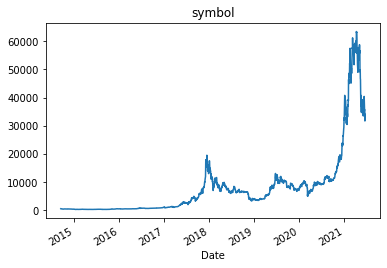

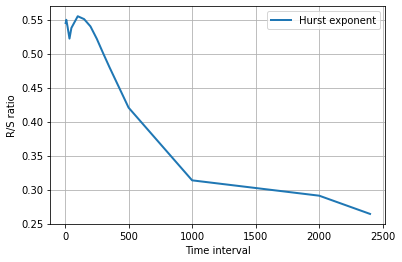

In [ ]:
create_hurst("BTC-USD")

Hurst exponent with 5 lags: 0.5585
Hurst exponent with 10 lags: 0.5785
Hurst exponent with 20 lags: 0.5556
Hurst exponent with 35 lags: 0.5221
Hurst exponent with 50 lags: 0.4771
Hurst exponent with 100 lags: 0.3755
Hurst exponent with 150 lags: 0.3158
Hurst exponent with 200 lags: 0.2901
Hurst exponent with 250 lags: 0.2741
Hurst exponent with 300 lags: 0.2640
Hurst exponent with 350 lags: 0.2596
Hurst exponent with 400 lags: 0.2564
Hurst exponent with 450 lags: 0.2528
Hurst exponent with 500 lags: 0.2487
Hurst exponent with 1000 lags: 0.2233
Hurst exponent with 2000 lags: -0.0278
Hurst exponent with 2400 lags: -0.0177


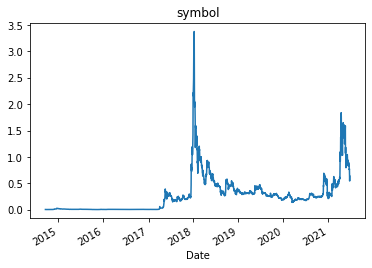

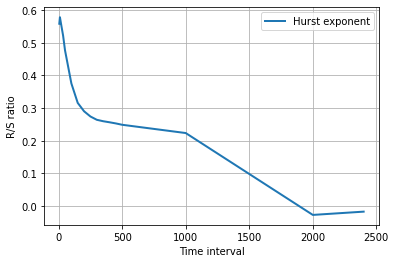

In [ ]:
create_hurst("XRP-USD")

Hurst exponent with 5 lags: 0.5235
Hurst exponent with 10 lags: 0.5155
Hurst exponent with 20 lags: 0.4697
Hurst exponent with 35 lags: 0.4513
Hurst exponent with 50 lags: 0.4467
Hurst exponent with 100 lags: 0.4083
Hurst exponent with 150 lags: 0.3953
Hurst exponent with 200 lags: 0.3899
Hurst exponent with 250 lags: 0.3808
Hurst exponent with 300 lags: 0.3726
Hurst exponent with 350 lags: 0.3696
Hurst exponent with 400 lags: 0.3670
Hurst exponent with 450 lags: 0.3624
Hurst exponent with 500 lags: 0.3565
Hurst exponent with 1000 lags: 0.2738
Hurst exponent with 2000 lags: 0.0874
Hurst exponent with 2400 lags: 0.0641


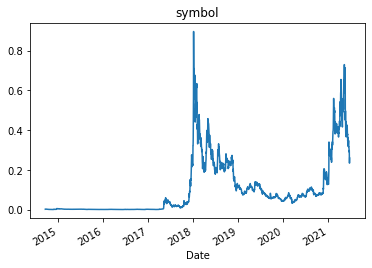

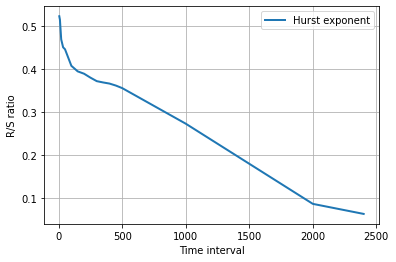

In [ ]:
create_hurst("XLM-USD")

Hurst exponent with 5 lags: 0.5732
Hurst exponent with 10 lags: 0.4821
Hurst exponent with 20 lags: 0.4290
Hurst exponent with 35 lags: 0.4449
Hurst exponent with 50 lags: 0.4406
Hurst exponent with 100 lags: 0.3593
Hurst exponent with 150 lags: 0.3239
Hurst exponent with 200 lags: 0.2967
Hurst exponent with 250 lags: 0.2719
Hurst exponent with 300 lags: 0.2513
Hurst exponent with 350 lags: 0.2349
Hurst exponent with 400 lags: 0.2217
Hurst exponent with 450 lags: 0.2110
Hurst exponent with 500 lags: 0.2022
Hurst exponent with 1000 lags: 0.1699
Hurst exponent with 2000 lags: 0.2323
Hurst exponent with 2400 lags: 0.2919


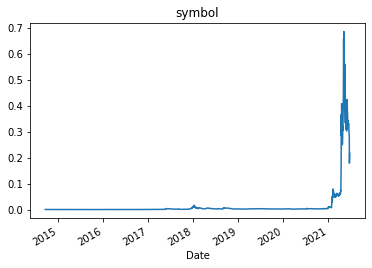

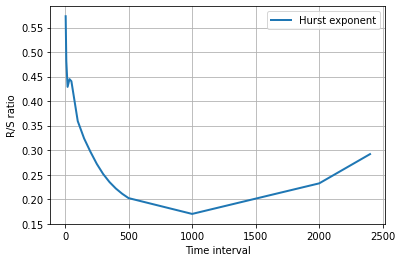

In [ ]:
create_hurst("DOGE-USD")

Hurst exponent with 5 lags: 0.0073
Hurst exponent with 10 lags: 0.0132
Hurst exponent with 20 lags: 0.0219
Hurst exponent with 35 lags: 0.0350
Hurst exponent with 50 lags: 0.0471
Hurst exponent with 100 lags: 0.0806
Hurst exponent with 150 lags: 0.1081
Hurst exponent with 200 lags: 0.1027
Hurst exponent with 250 lags: 0.1045
Hurst exponent with 300 lags: 0.1100
Hurst exponent with 350 lags: 0.1133
Hurst exponent with 400 lags: 0.1173
Hurst exponent with 450 lags: 0.1233
Hurst exponent with 500 lags: 0.1324
Hurst exponent with 1000 lags: 0.2006
Hurst exponent with 2000 lags: 0.2076
Hurst exponent with 2400 lags: 0.1746


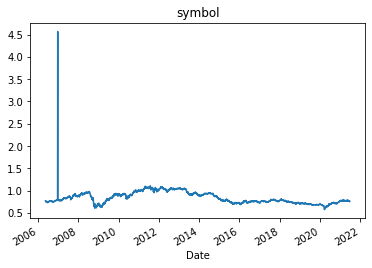

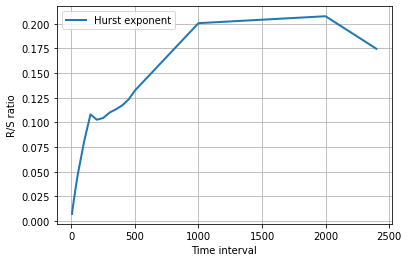

In [ ]:
create_hurst("AUDUSD=X")

Hurst exponent with 5 lags: 0.3616
Hurst exponent with 10 lags: 0.4086
Hurst exponent with 20 lags: 0.4512
Hurst exponent with 35 lags: 0.4703
Hurst exponent with 50 lags: 0.4771
Hurst exponent with 100 lags: 0.4879
Hurst exponent with 150 lags: 0.5023
Hurst exponent with 200 lags: 0.5053
Hurst exponent with 250 lags: 0.4974
Hurst exponent with 300 lags: 0.4814
Hurst exponent with 350 lags: 0.4595
Hurst exponent with 400 lags: 0.4375
Hurst exponent with 450 lags: 0.4208
Hurst exponent with 500 lags: 0.4107
Hurst exponent with 1000 lags: 0.3554
Hurst exponent with 2000 lags: 0.2924
Hurst exponent with 2400 lags: 0.2721


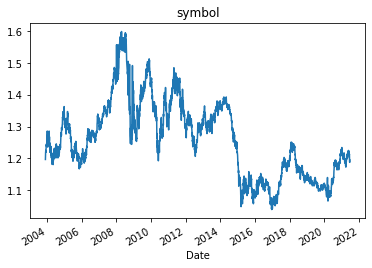

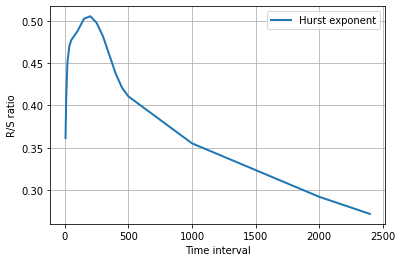

In [ ]:
create_hurst("EURUSD=X")

Hurst exponent with 5 lags: 0.4672
Hurst exponent with 10 lags: 0.4794
Hurst exponent with 20 lags: 0.4880
Hurst exponent with 35 lags: 0.5018
Hurst exponent with 50 lags: 0.5045
Hurst exponent with 100 lags: 0.5167
Hurst exponent with 150 lags: 0.5122
Hurst exponent with 200 lags: 0.5044
Hurst exponent with 250 lags: 0.5009
Hurst exponent with 300 lags: 0.5001
Hurst exponent with 350 lags: 0.5003
Hurst exponent with 400 lags: 0.5003
Hurst exponent with 450 lags: 0.5002
Hurst exponent with 500 lags: 0.5005
Hurst exponent with 1000 lags: 0.4829
Hurst exponent with 2000 lags: 0.3026
Hurst exponent with 2400 lags: 0.2558


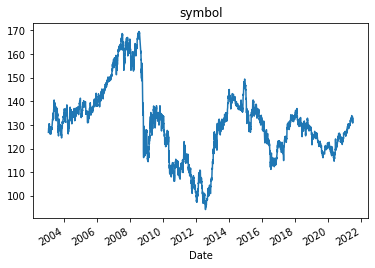

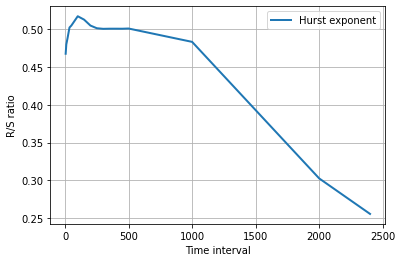

In [ ]:
create_hurst("EURJPY=X")

Hurst exponent with 5 lags: 0.4893
Hurst exponent with 10 lags: 0.4856
Hurst exponent with 20 lags: 0.4831
Hurst exponent with 35 lags: 0.4858
Hurst exponent with 50 lags: 0.4904
Hurst exponent with 100 lags: 0.5061
Hurst exponent with 150 lags: 0.5001
Hurst exponent with 200 lags: 0.4838
Hurst exponent with 250 lags: 0.4682
Hurst exponent with 300 lags: 0.4556
Hurst exponent with 350 lags: 0.4456
Hurst exponent with 400 lags: 0.4363
Hurst exponent with 450 lags: 0.4258
Hurst exponent with 500 lags: 0.4161
Hurst exponent with 1000 lags: 0.3364
Hurst exponent with 2000 lags: 0.1738
Hurst exponent with 2400 lags: 0.1438


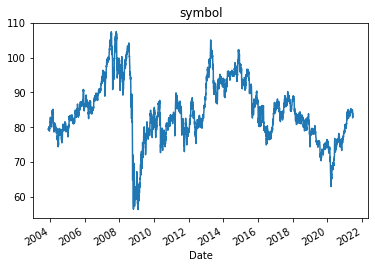

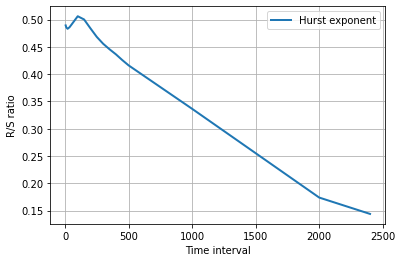

In [ ]:
create_hurst("AUDJPY=X")

Hurst exponent with 5 lags: 0.4873
Hurst exponent with 10 lags: 0.5030
Hurst exponent with 20 lags: 0.5441
Hurst exponent with 35 lags: 0.5566
Hurst exponent with 50 lags: 0.5553
Hurst exponent with 100 lags: 0.5444
Hurst exponent with 150 lags: 0.5468
Hurst exponent with 200 lags: 0.5597
Hurst exponent with 250 lags: 0.5659
Hurst exponent with 300 lags: 0.5639
Hurst exponent with 350 lags: 0.5560
Hurst exponent with 400 lags: 0.5450
Hurst exponent with 450 lags: 0.5309
Hurst exponent with 500 lags: 0.5149
Hurst exponent with 1000 lags: 0.3869
Hurst exponent with 2000 lags: 0.3336
Hurst exponent with 2400 lags: 0.3433


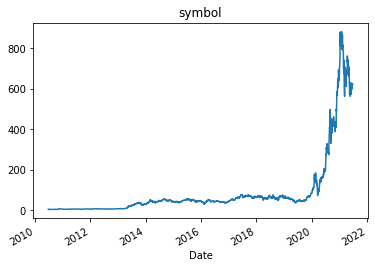

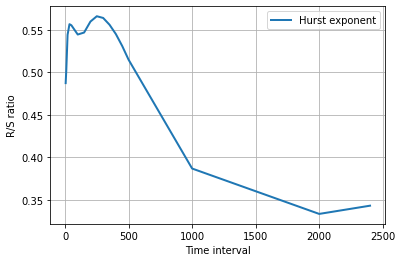

In [ ]:
create_hurst("TSLA")

Hurst exponent with 5 lags: 0.4752
Hurst exponent with 10 lags: 0.4778
Hurst exponent with 20 lags: 0.4989
Hurst exponent with 35 lags: 0.5146
Hurst exponent with 50 lags: 0.5157
Hurst exponent with 100 lags: 0.5205
Hurst exponent with 150 lags: 0.5310
Hurst exponent with 200 lags: 0.5487
Hurst exponent with 250 lags: 0.5665
Hurst exponent with 300 lags: 0.5768
Hurst exponent with 350 lags: 0.5785
Hurst exponent with 400 lags: 0.5796
Hurst exponent with 450 lags: 0.5782
Hurst exponent with 500 lags: 0.5727
Hurst exponent with 1000 lags: 0.5062
Hurst exponent with 2000 lags: 0.4582
Hurst exponent with 2400 lags: 0.4475


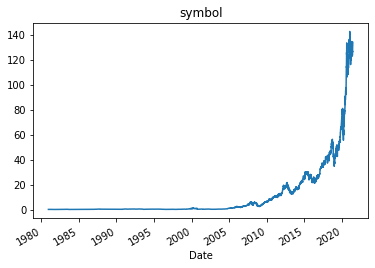

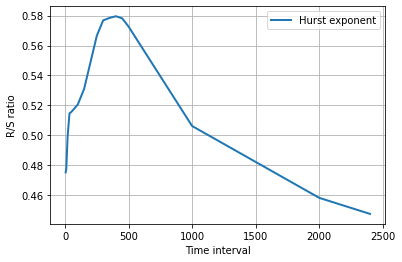

In [ ]:
create_hurst("AAPL")

In [ ]:
np.random.seed(26240)
x1 = np.cumsum(np.random.randn(100))
np.random.seed(81984)
x2 = np.cumsum(np.random.randn(100))

H1, _, _ = hurst.compute_Hc(x1, kind="random_walk", simplified=False)
H2, _, _ = hurst.compute_Hc(x2, kind="random_walk", simplified=True)

print(H1)  # 1.018265313908482
print(H2)  # 1.008202895027869

1.0182653139084825
1.0082028950278692


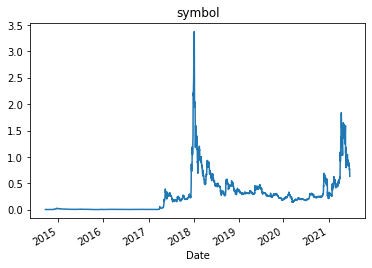

In [ ]:
dfx= yf.download("XRP-USD", progress=False)
dfx["Adj Close"].plot(title="symbol")

In [ ]:
H1, H2, H3 = hurst.compute_Hc(dfx["Adj Close"])
print(H1)
print(H2)
print(H3)

0.5736899261056712
1.1229262517555805
[[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1778, 2466], [3.983330510931965, 5.507369301259037, 8.101836232208033, 11.53054759865968, 16.92788516217479, 23.83099439171111, 29.486560021643808, 38.837986433058916, 72.15398736143808, 69.10006386056843, 99.53921920945245]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

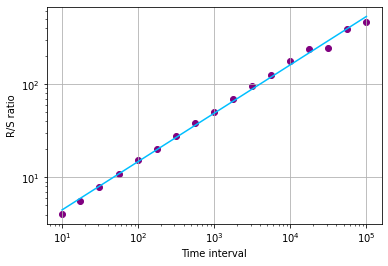

H=0.5183, c=1.3587


In [ ]:
# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)
np.random.seed(42)
random_changes = 1. + np.random.randn(99999) / 1000.
series = np.cumprod(random_changes)  # create a random walk from random changes

# Evaluate Hurst equation
H, c, data = compute_Hc(series, min_window=10, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

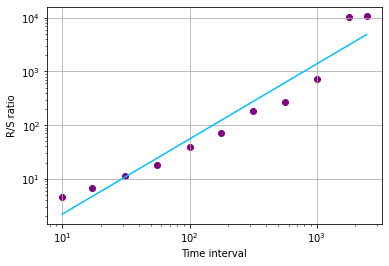

H=1.4017, c=0.0864


In [ ]:
# Evaluate Hurst equation
H, c, data = compute_Hc(dfx["Adj Close"], kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))